# Koch curve using jupyter and matplotlib


 Импортируем необходимы модули:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import point as p

Основная функция:
n - глубина построенияя (если = 0, возвращаемся), 
p1 - стартовая точка, 
p2 - конечная точка, 
xx - массив значений x, 
yy - массив значений y

Задаём три фрактальные точки

In [2]:
def koch_curve(n, p1, p2, xx, yy):
    if n == 0:
        return
    theta = np.pi / 3
    s = p.Point(p1.x + (p2.x - p1.x) / 3, p1.y + (p2.y - p1.y) / 3)
    t = p.Point(p2.x - (p2.x - p1.x) / 3, p2.y - (p2.y - p1.y) / 3)
    u = p.Point(np.cos(theta) * (t.x - s.x) - np.sin(theta) * (t.y - s.y) + s.x,
            np.sin(theta) * (t.x - s.x) + np.cos(theta) * (t.y - s.y) + s.y)
    koch_curve(n - 1, p1, s, xx, yy)
    xx.append(s.x)
    yy.append(s.y)

    koch_curve(n - 1, s, u, xx, yy)
    xx.append(u.x)
    yy.append(u.y)

    koch_curve(n - 1, u, t, xx, yy)
    xx.append(t.x)
    yy.append(t.y)
    koch_curve(n - 1, t, p2, xx, yy)
    return xx, yy

Задаём начальные условия (точку старта, точку финиша, глубину рекурсии)

Инициализируем массивы x и y координат, добавляем в них точку старта

Выполнение основной функции

Отрисовка графика по найдённым точкам

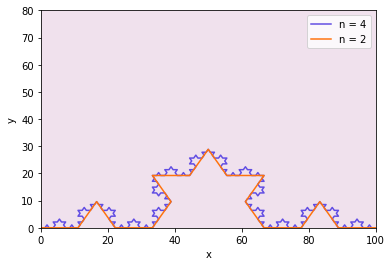

In [3]:

if __name__ == '__main__':
    start, end = p.Point(0, 0), p.Point(100, 0)
    x_points1 = []
    y_points1 = []
    x_points2 = []
    y_points2 = []
    x_points1.append(start.x)
    y_points1.append(start.y)
    x_points2.append(start.x)
    y_points2.append(start.y)
    nxx, nyy = koch_curve(2, start, end, x_points1, y_points1)
    mxx, myy = koch_curve(4, start, end, x_points2, y_points2)
    nxx.append(end.x)
    nyy.append(end.y)
    mxx.append(end.x)
    myy.append(end.y)
    ax = plt.subplot(111)
    ax.set(xlim=[0, 100], ylim=[0, 80], xlabel="x", ylabel="y",)
    plot_dictionary2 = {'dx2': mxx, 'dy2': myy}
    ax.plot('dx2', 'dy2', data=plot_dictionary2, color='#614de3', label="n = 4")
    plot_dictionary1 = {'dx1': nxx, 'dy1': nyy}
    ax.plot('dx1', 'dy1', data=plot_dictionary1, color='#ff720d', label="n = 2")
    ax.set_facecolor('#f0e1ed')
    ax.legend()
    plt.show()
